In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks_beta')

In [4]:
metric_dicts = [
    {
        'model_name': 'random_guess',
        '5nn_accuracy': 1/46
    }
]

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='5nn_accuracy', ignore_index=True)

In [6]:
metrics

,model_name,5nn_accuracy,alignment,uniformity,alignment + uniformity
0,random_guess,0.021739,NaN,NaN,NaN
1,random_embedder_1,0.096522,0.689678,-0.673951,0.015727
2,random_embedder_2,0.097826,0.797777,-0.784192,0.013585
3,random_embedder_3,0.098696,0.873280,-0.832943,0.040337
4,random_embedder_4,0.099348,1.028797,-1.011197,0.017601
5,random_embedder_0,0.102609,0.688372,-0.684504,0.003868
6,atchley_embedder,0.103913,0.835641,-0.780887,0.054754
7,BetaCDR3BERT_a_6_128_8_512-embed_5,0.204783,0.847306,-0.881839,-0.034533
8,BetaCDR3BERT_ap_6_128_8_512-embed_5,0.258043,0.932148,-0.967318,-0.035171
9,cdr3_levenshtein,0.259783,NaN,NaN,NaN


In [7]:

def collapse_names(name):
    groups = (
        'AutoContrastive_BetaCDR3BERT',
        'BetaCDR3BERT_ap',
        'BetaCDR3BERT_a',
        'random_embedder'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

In [8]:
metrics

,model_name,5nn_accuracy,alignment,uniformity,alignment + uniformity
0,random_guess,0.021739,NaN,NaN,NaN
1,random_embedder,0.096522,0.689678,-0.673951,0.015727
2,random_embedder,0.097826,0.797777,-0.784192,0.013585
3,random_embedder,0.098696,0.873280,-0.832943,0.040337
4,random_embedder,0.099348,1.028797,-1.011197,0.017601
5,random_embedder,0.102609,0.688372,-0.684504,0.003868
6,atchley_embedder,0.103913,0.835641,-0.780887,0.054754
7,BetaCDR3BERT_a,0.204783,0.847306,-0.881839,-0.034533
8,BetaCDR3BERT_ap,0.258043,0.932148,-0.967318,-0.035171
9,cdr3_levenshtein,0.259783,NaN,NaN,NaN


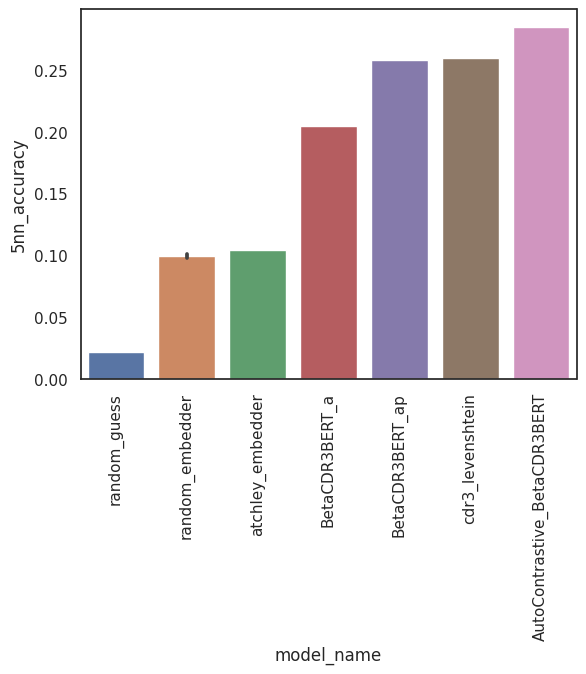

In [9]:
knn_acc_plot = seaborn.barplot(metrics, x='model_name', y='5nn_accuracy')
knn_acc_plot.set_xticklabels(knn_acc_plot.get_xticklabels(), rotation=90)
plt.show()

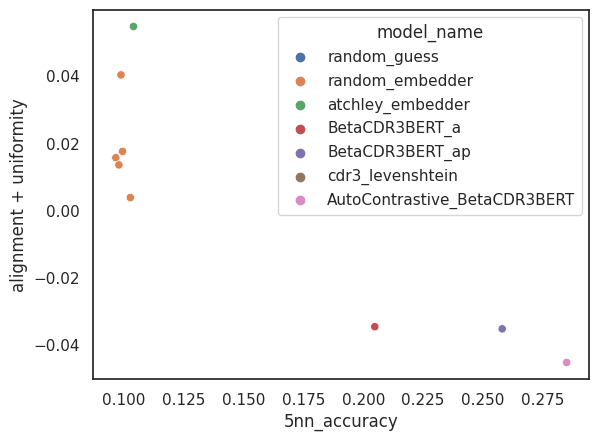

In [10]:
scatter_model_names = seaborn.scatterplot(metrics, x='5nn_accuracy', y='alignment + uniformity', hue='model_name')
plt.show()

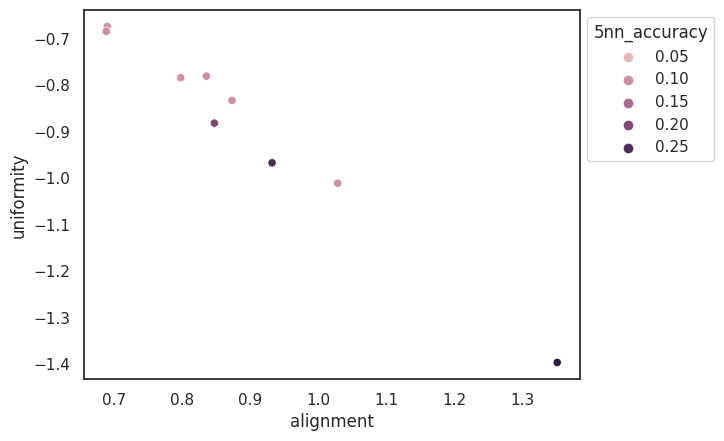

In [11]:
scatter_model_names = seaborn.scatterplot(metrics, x='alignment', y='uniformity', hue='5nn_accuracy')
seaborn.move_legend(scatter_model_names, 'upper left', bbox_to_anchor=(1, 1))
plt.show()